<a href="https://colab.research.google.com/github/Leogrimes25/Minera-o-de-Dados-no-Colab/blob/main/Projeto_Disney.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from yellowbrick.classifier import ConfusionMatrix
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
base_disney= pd.read_csv("/content/sample_data/disney_plus.csv")
base_disney

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


FileNotFoundError: [Errno 2] No such file or directory: '/content/sample_data/disney_plus.csv'

In [ ]:
base_disney.fillna("Não Informado",inplace=True)


In [ ]:
base_disney.rename(columns={
    "show_id":"id",
    "type":"tipo",
    "title":"titulo",
    "director":"diretor",
    "cast":"elenco",
    "country":"país",
    "date_added":"data_adicao",
    "release_year":"ano_lançamento",
    "rating":"classificação_etária",
    "duration":"duração",
    "listed_in":"gênero",
    "description":"sinopse"},inplace=True)



In [ ]:
data_adicao = base_disney['data_adicao']
base_disney['data_adicao'] = base_disney['data_adicao'].replace('Não Informado', np.nan)
base_disney['data_adicao'] = pd.to_datetime(base_disney['data_adicao'], errors='coerce', format='%B %d, %Y')

In [ ]:
base_disney.head(50)

,id,tipo,titulo,diretor,elenco,país,data_adicao,ano_lançamento,classificação_etária,duração,gênero,sinopse
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",Não Informado,2021-11-26,2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",Não Informado,2021-11-26,1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,2021-11-26,2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",Não Informado,2021-11-26,2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,Não Informado,"John Lennon, Paul McCartney, George Harrison, ...",Não Informado,2021-11-25,2021,Não Informado,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...
5,s6,Movie,Becoming Cousteau,Liz Garbus,"Jacques Yves Cousteau, Vincent Cassel",United States,2021-11-24,2021,PG-13,94 min,"Biographical, Documentary",An inside look at the legendary life of advent...
6,s7,TV Show,Hawkeye,Não Informado,"Jeremy Renner, Hailee Steinfeld, Vera Farmiga,...",Não Informado,2021-11-24,2021,TV-14,1 Season,"Action-Adventure, Superhero",Clint Barton/Hawkeye must team up with skilled...
7,s8,TV Show,Port Protection Alaska,Não Informado,"Gary Muehlberger, Mary Miller, Curly Leach, Sa...",United States,2021-11-24,2015,TV-14,2 Seasons,"Docuseries, Reality, Survival",Residents of Port Protection must combat volat...
8,s9,TV Show,Secrets of the Zoo: Tampa,Não Informado,"Dr. Ray Ball, Dr. Lauren Smith, Chris Massaro,...",United States,2021-11-24,2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family",A day in the life at ZooTampa is anything but ...
9,s10,Movie,A Muppets Christmas: Letters To Santa,Kirk R. Thatcher,"Steve Whitmire, Dave Goelz, Bill Barretta, Eri...",United States,2021-11-19,2008,G,45 min,"Comedy, Family, Musical",Celebrate the holiday season with all your fav...


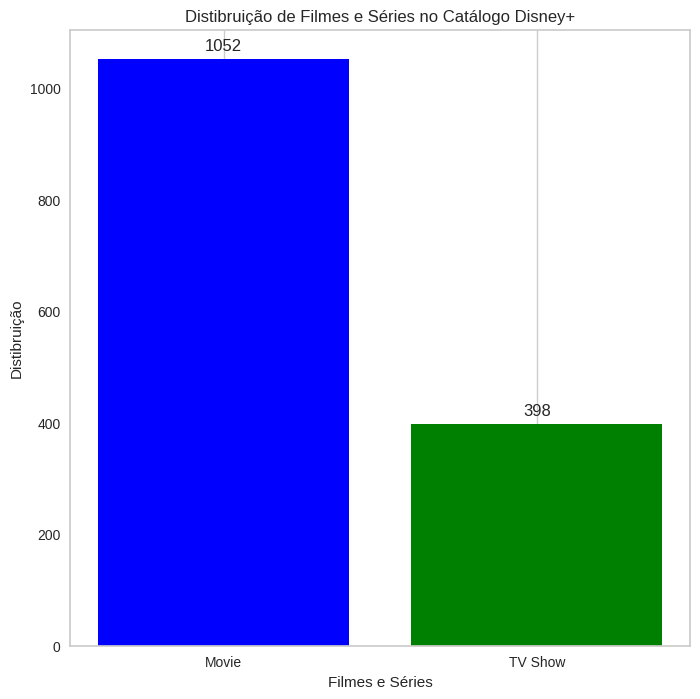

In [ ]:
contagem_filmes= base_disney['tipo'].value_counts()
plt.figure(figsize=(8,8))
barra=plt.bar(contagem_filmes.index,contagem_filmes.values,color=['blue','green'])
for bar in barra:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 10, int(yval), ha='center', va='bottom')
plt.xlabel('Filmes e Séries')
plt.ylabel('Distibruição')
plt.title('Distibruição de Filmes e Séries no Catálogo Disney+')
plt.grid(axis='y')
plt.show()

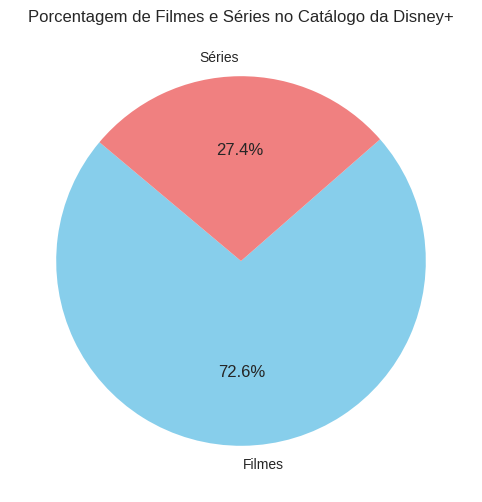

In [ ]:
tipo=base_disney['tipo']
total_filmes = (tipo == 'Movie').sum()
total_series = (tipo == 'TV Show').sum()
porcentagem_filmes = (total_filmes / (total_filmes + total_series)) * 100
porcentagem_series = (total_series / (total_filmes + total_series)) * 100
labels = ['Filmes', 'Séries']
sizes = [porcentagem_filmes, porcentagem_series]
colors = ['skyblue', 'lightcoral']
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Porcentagem de Filmes e Séries no Catálogo da Disney+')
plt.show()

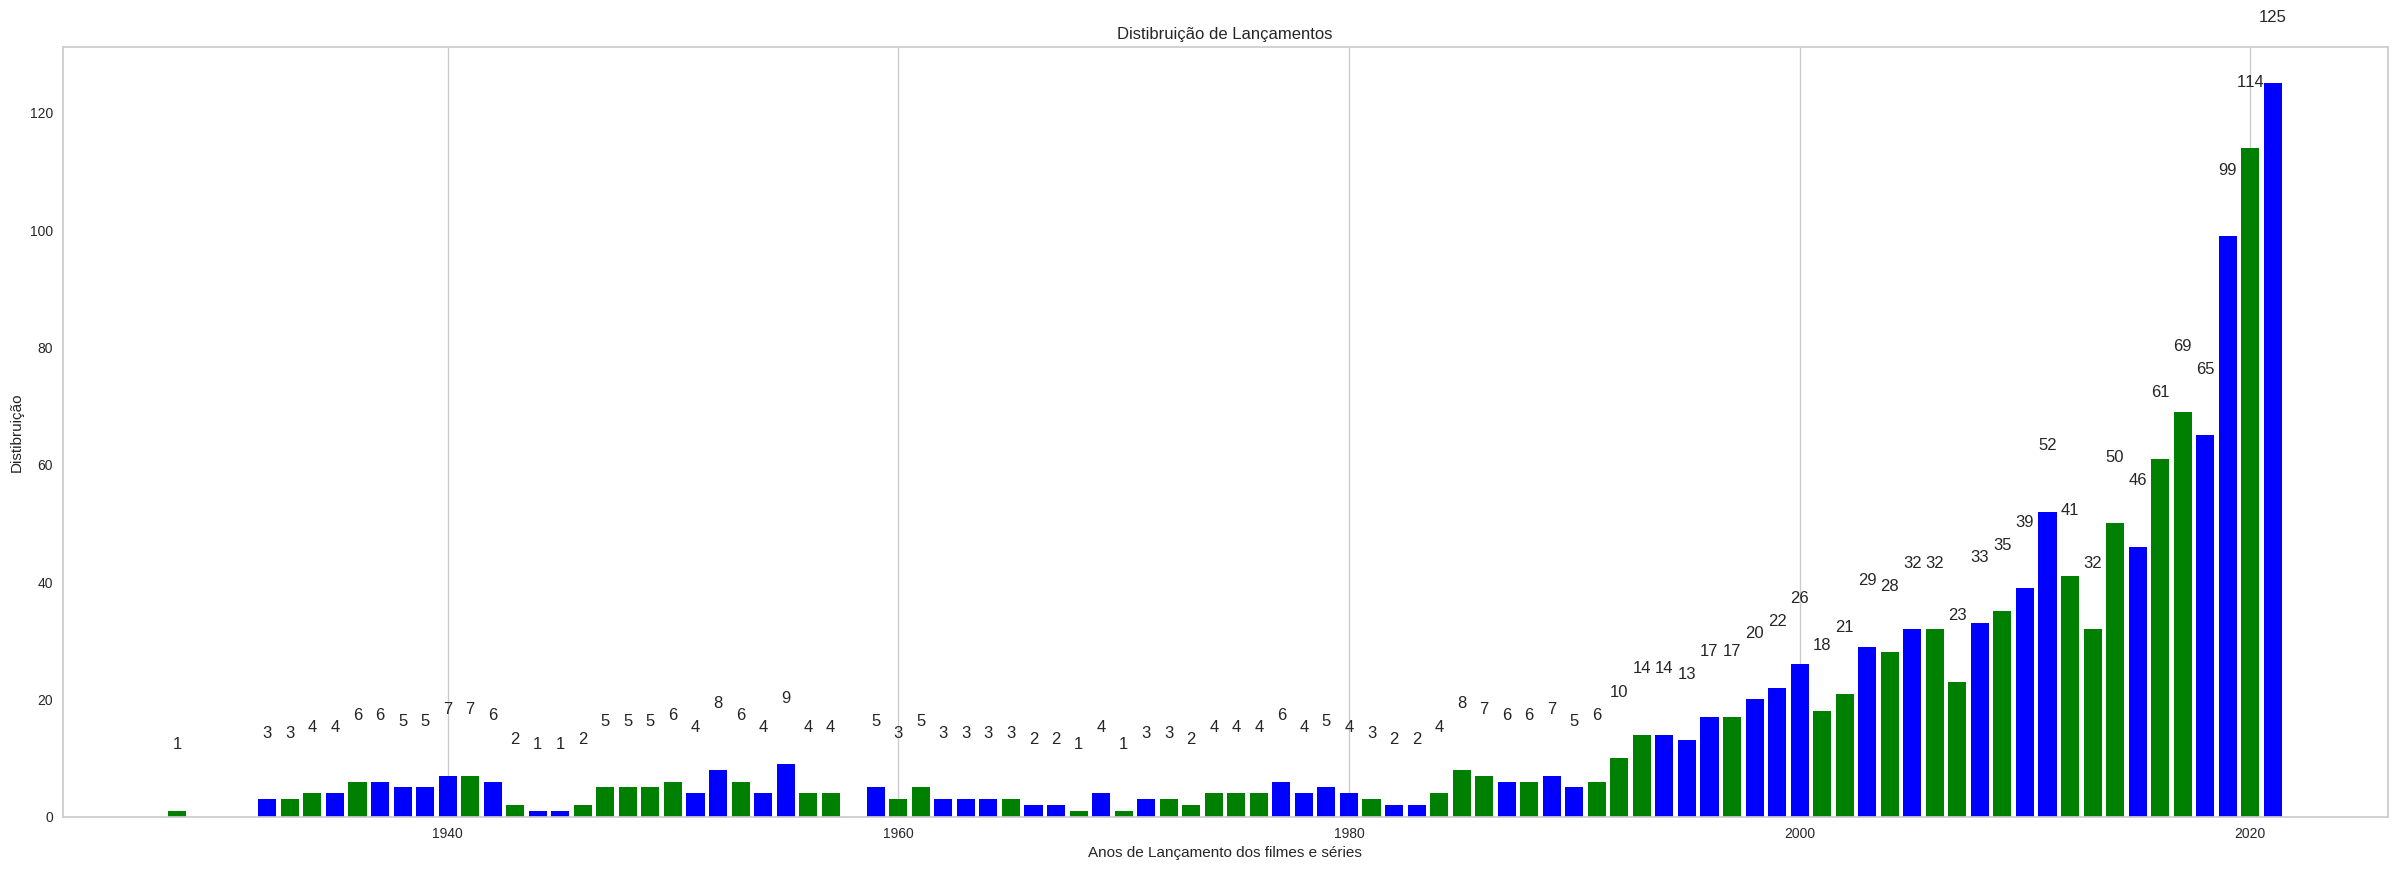

In [ ]:
distribuicao_ano_lançamento= base_disney['ano_lançamento'].value_counts()
plt.figure(figsize=(30,10))
barra=plt.bar(distribuicao_ano_lançamento.index, distribuicao_ano_lançamento.values,color=['blue','green'])
for bar in barra:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 10, int(yval), ha='center', va='bottom')
plt.xlabel('Anos de Lançamento dos filmes e séries')
plt.ylabel('Distibruição')
plt.title('Distibruição de Lançamentos')
plt.grid(axis='y')
plt.show()

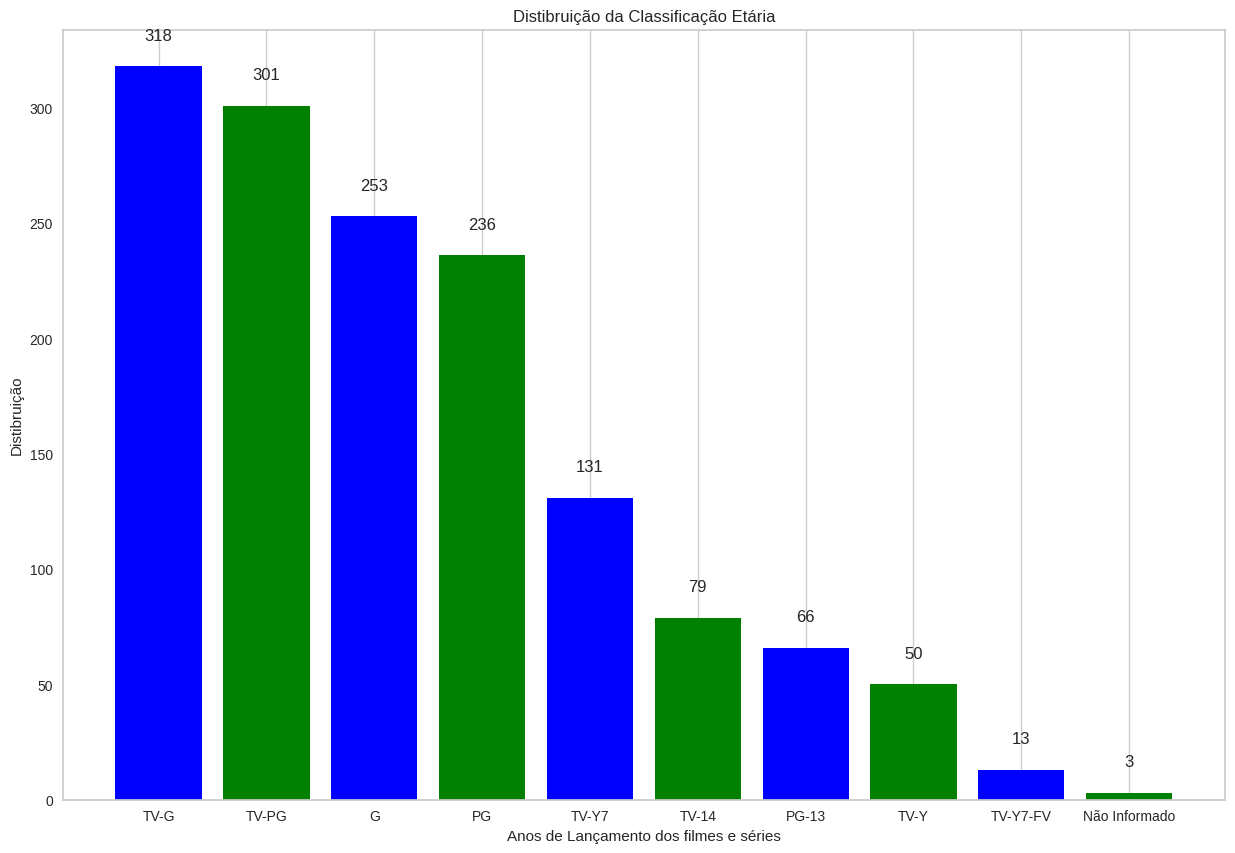

In [ ]:
distribuicao_classificacao_etaria = base_disney['classificação_etária'].value_counts()
plt.figure(figsize=(15,10))
barra=plt.bar(distribuicao_classificacao_etaria.index, distribuicao_classificacao_etaria.values,color=['blue','green'])
for bar in barra:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 10, int(yval), ha='center', va='bottom')
plt.xlabel('Anos de Lançamento dos filmes e séries')
plt.ylabel('Distibruição')
plt.title('Distibruição da Classificação Etária')
plt.grid(axis='y')
plt.show()

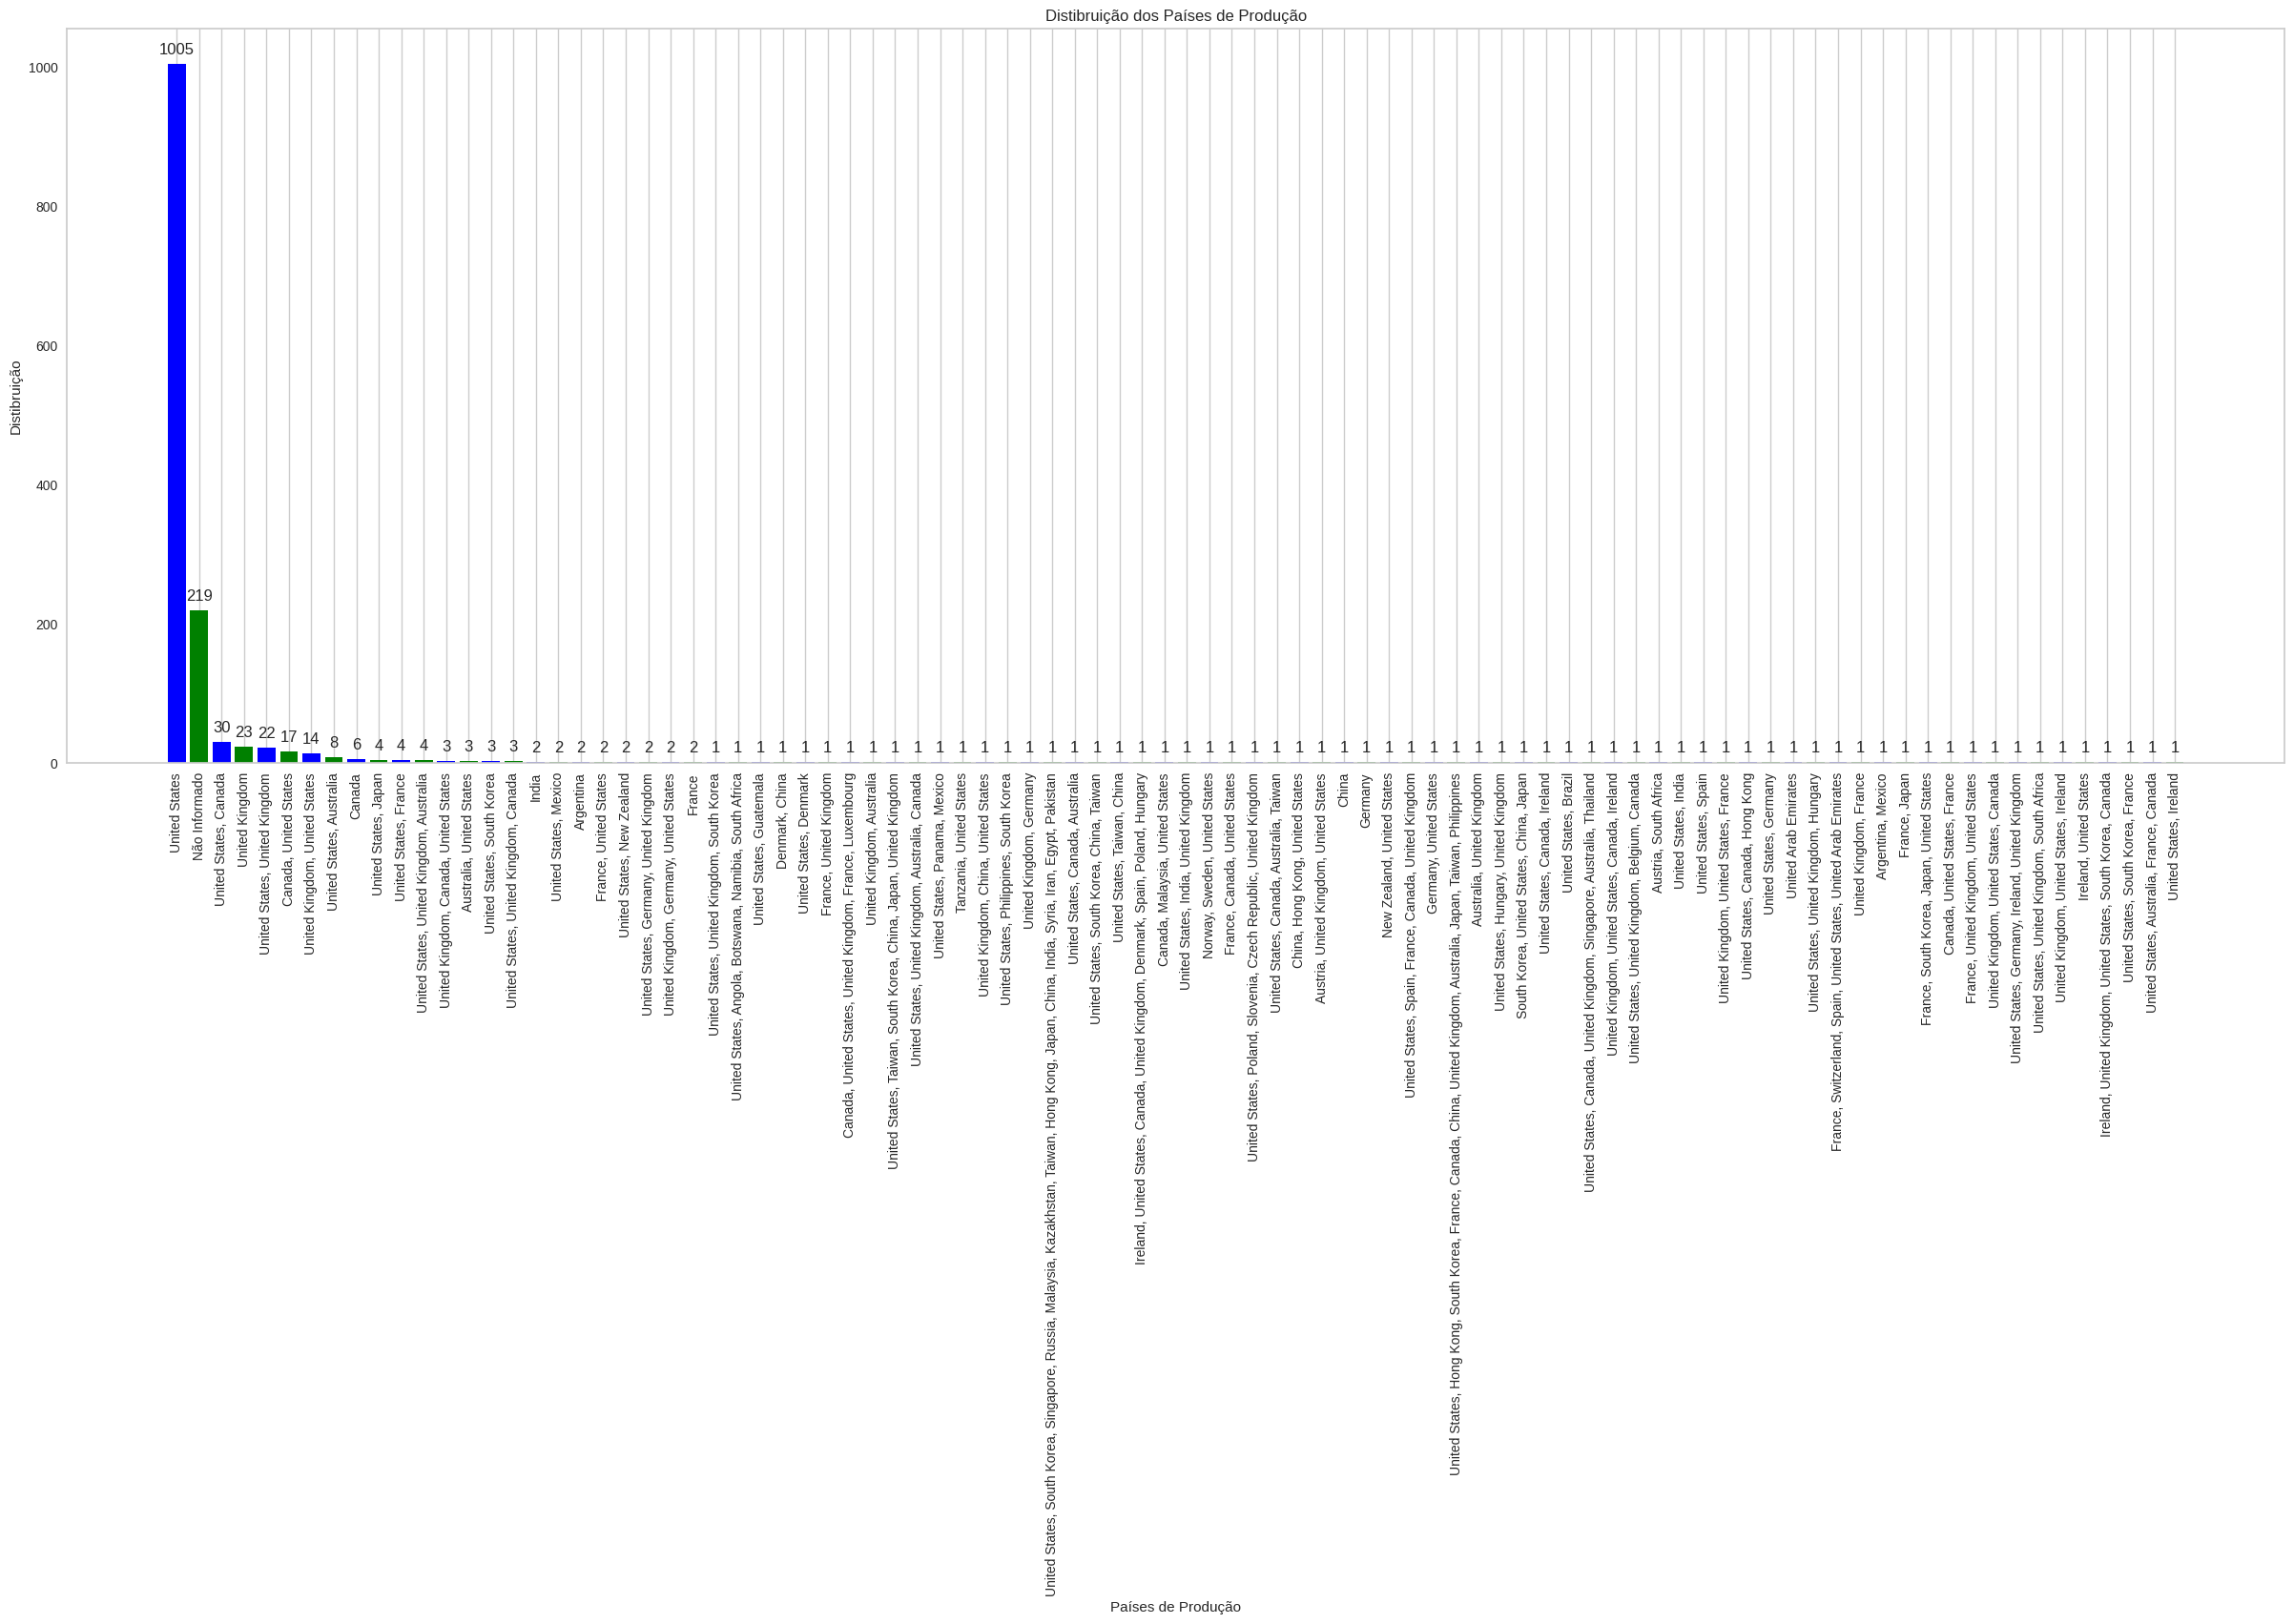

In [ ]:
distribuicao_paises = base_disney['país'].value_counts()
plt.figure(figsize=(30,10))
barra=plt.bar(distribuicao_paises.index, distribuicao_paises.values,color=['blue','green'])
for bar in barra:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 10, int(yval), ha='center', va='bottom')

plt.xlabel('Países de Produção')
plt.ylabel('Distibruição')
plt.title('Distibruição dos Países de Produção')
plt.grid(axis='y')
plt.xticks(rotation=90)
plt.show()

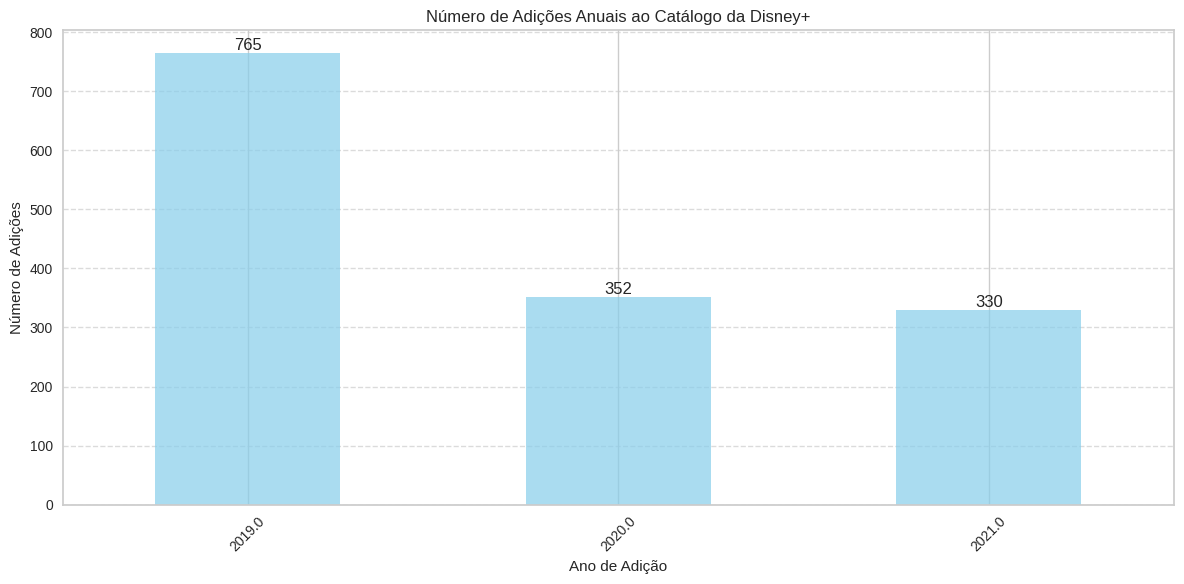

In [ ]:
data_adicao = base_disney['data_adicao']
base_disney['ano_adicao'] = base_disney['data_adicao'].dt.year
contagem_anual = base_disney['ano_adicao'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
contagem_anual.plot(kind='bar', color='skyblue', alpha=0.7)
plt.xlabel('Ano de Adição')
plt.ylabel('Número de Adições')
plt.title('Número de Adições Anuais ao Catálogo da Disney+')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, valor in enumerate(contagem_anual):
    plt.text(i, valor, str(valor), ha='center', va='bottom')

plt.tight_layout()
plt.show()

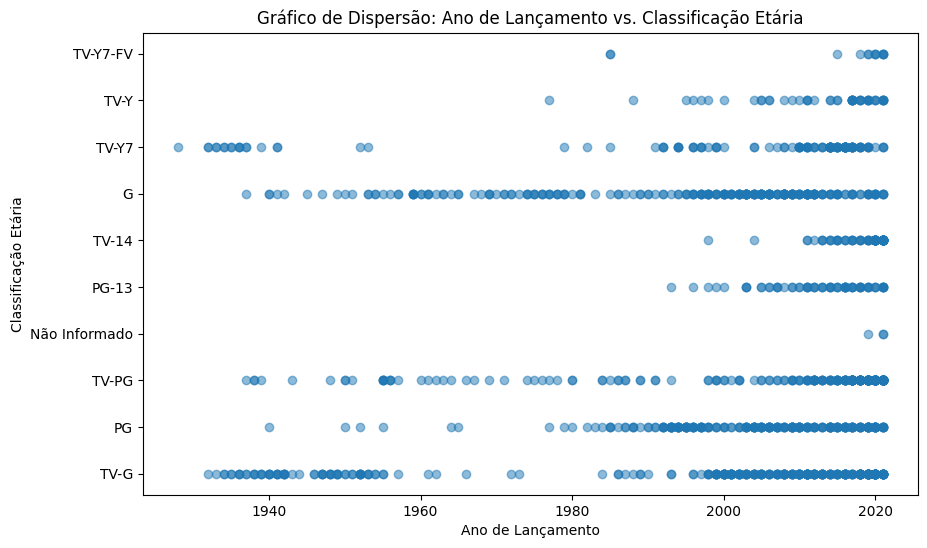

In [ ]:
ano_lancamento = base_disney['ano_lançamento']
classificacao= base_disney['classificação_etária']
plt.figure(figsize=(10, 6))
plt.scatter(ano_lancamento, classificacao, alpha=0.5)
plt.xlabel('Ano de Lançamento')
plt.ylabel('Classificação Etária')
plt.title('Gráfico de Dispersão: Ano de Lançamento vs. Classificação Etária')
plt.show()

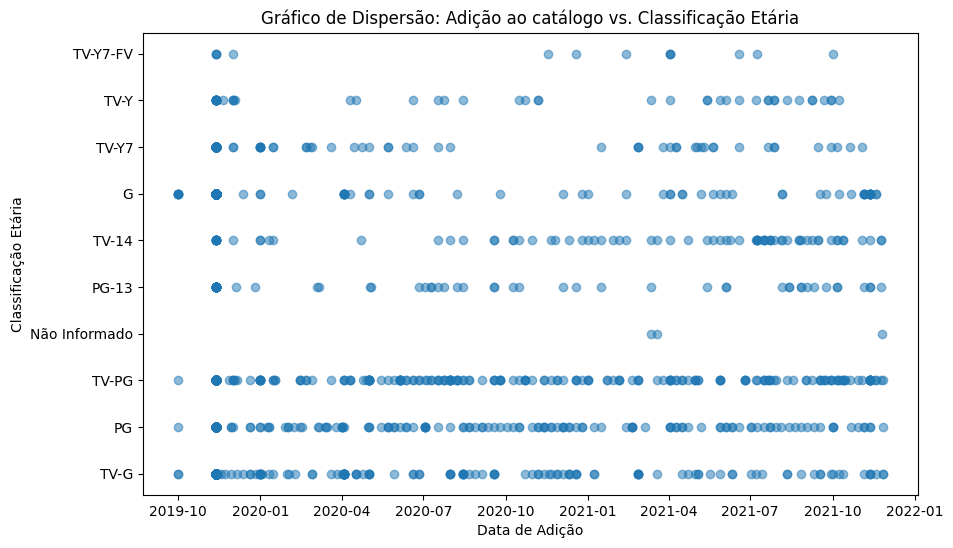

In [ ]:
ano_lancamento = base_disney['data_adicao']
classificacao= base_disney['classificação_etária']
plt.figure(figsize=(10, 6))
plt.scatter(ano_lancamento, classificacao, alpha=0.5)
plt.xlabel('Data de Adição')
plt.ylabel('Classificação Etária')
plt.title('Gráfico de Dispersão: Adição ao catálogo vs. Classificação Etária')
plt.show()

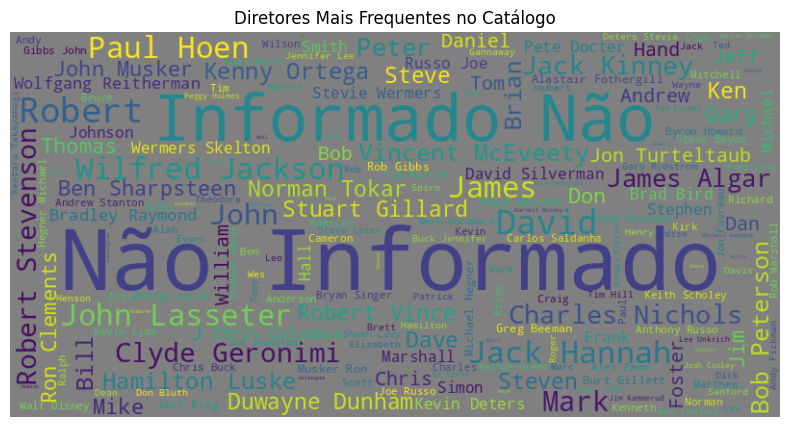

In [ ]:
nuvem_diretores = ' '.join(base_disney['diretor'].astype(str))
nuvem_palavras=WordCloud(width=800, height=400,background_color='grey').generate(nuvem_diretores)
plt.figure(figsize=(10, 5))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis('off')
plt.title('Diretores Mais Frequentes no Catálogo')
plt.show()

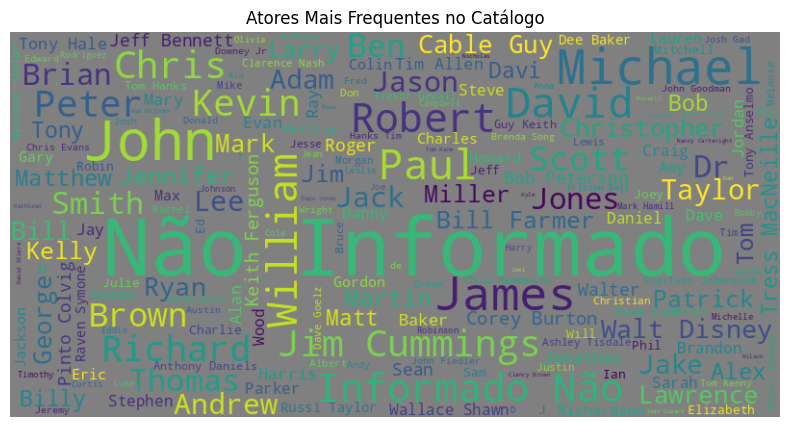

In [ ]:
nuvem_elenco = ' '.join(base_disney['elenco'].astype(str))
nuvem_palavras=WordCloud(width=800, height=400,background_color='grey').generate(nuvem_elenco)
plt.figure(figsize=(10, 5))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis('off')
plt.title('Atores Mais Frequentes no Catálogo')
plt.show()

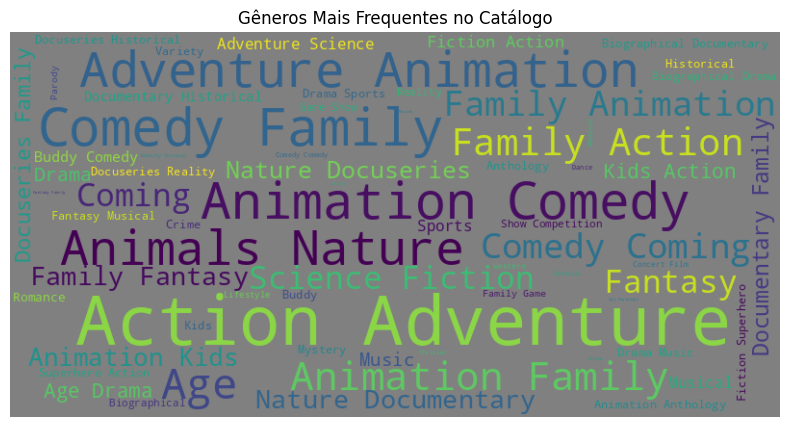

In [ ]:
nuvem_genero = ' '.join(base_disney['gênero'].astype(str))
nuvem_palavras=WordCloud(width=800, height=400,background_color='grey').generate(nuvem_genero)
plt.figure(figsize=(10, 5))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis('off')
plt.title('Gêneros Mais Frequentes no Catálogo')
plt.show()

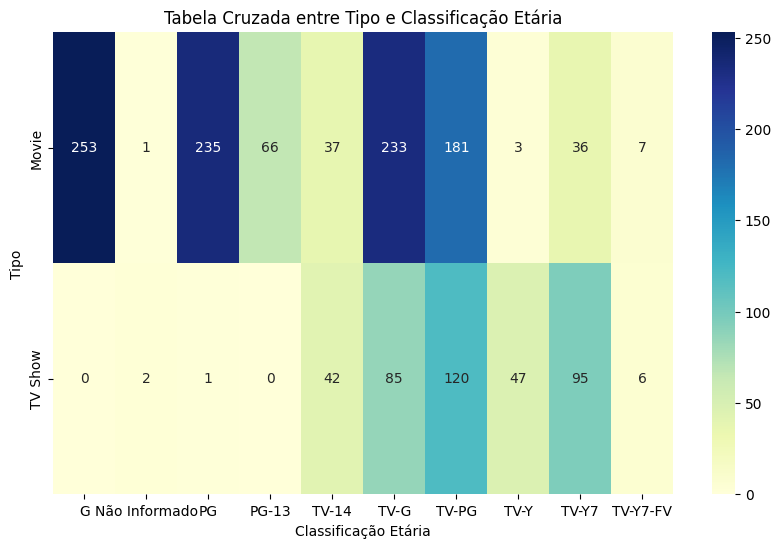

In [ ]:
tabela_crosstab = pd.crosstab(base_disney['tipo'],base_disney['classificação_etária'])
plt.figure(figsize=(10, 6))
sns.heatmap(tabela_crosstab, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Classificação Etária')
plt.ylabel('Tipo')
plt.title('Tabela Cruzada entre Tipo e Classificação Etária')
plt.show()

In [ ]:
X = base_disney['sinopse']
Y = base_disney['tipo']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.44, random_state=42)

In [ ]:
stop_words = set(stopwords.words('english'))
tfidf_vectorizer = TfidfVectorizer(stop_words=list(stop_words), max_features=10000)

In [ ]:
X_train = X_train.astype(str)

In [ ]:
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
X_train_tfidf

<812x3017 sparse matrix of type '<class 'numpy.float64'>'
	with 6631 stored elements in Compressed Sparse Row format>

In [ ]:
X_test_tfidf

<638x3017 sparse matrix of type '<class 'numpy.float64'>'
	with 3597 stored elements in Compressed Sparse Row format>

In [ ]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, Y_train)

MultinomialNB()

In [ ]:
y_pred = nb_classifier.predict(X_test_tfidf)

In [ ]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

       Movie       0.72      1.00      0.84       458
     TV Show       0.80      0.02      0.04       180

    accuracy                           0.72       638
   macro avg       0.76      0.51      0.44       638
weighted avg       0.74      0.72      0.61       638



/usr/local/lib/python3.10/dist-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


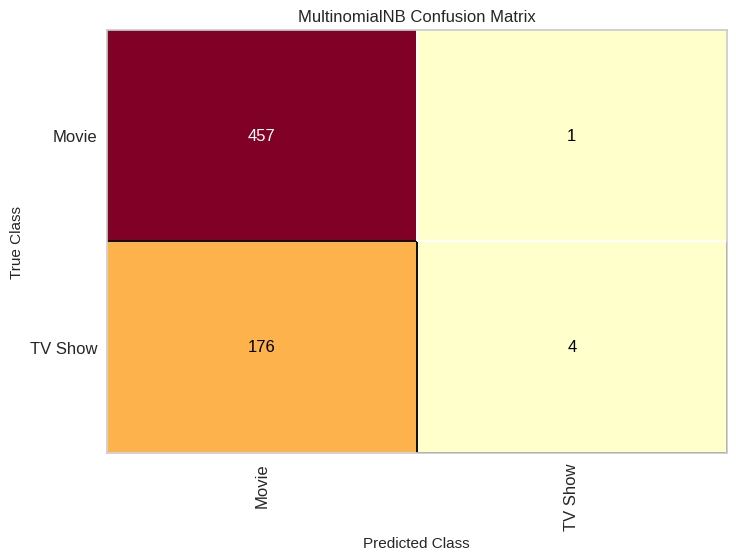

<Figure size 800x600 with 0 Axes>

In [ ]:
cm = ConfusionMatrix(nb_classifier, classes=sorted(Y.unique()))
cm.score(X_test_tfidf, Y_test)
plt.figure(figsize=(8, 6))
cm.poof()
plt.show()